# High order accurate time integration methods

### Information about the course
1. Teacher: Davide Torlo, postdoc at Cardamom in Inria Bordeaux, working on hyperbolic PDE, shallow water, finite element, model order reduction
1. 12 hours: $14^{th}-15^{th}$ March, 9.00-12.00  +  13.30-16.30
1. Check presence every 
1. Share half screen for whiteboard or Jupyter Notebook
1. Jupyter notebooks on [GitHub](https://github.com/accdavlo/HighOrderODESolvers) (python3, few packages (numpy, scipy, matplotlib, nodepy)) or open them in [Google colab](https://drive.google.com/drive/folders/15Vk_JM7t8YRjYtBX3Okqvr7rnBgPybzB?usp=sharing)
1. Prerequisite: a bit of coding (anything is fine), basics of mathematics
1. Topic is recent, but not difficult
1. References: 
    1. Remi Abgrall's course at University of Zurich [course page](https://www.math.uzh.ch/index.php?id=ve_vo_det&key2=2970&keySemId=34) and [notes](https://www.math.uzh.ch/typo3conf/ext/qfq/Classes/Api/download.php?s=605796143d42a) 
    1. Hairer E., Nørsett S. P., Wanner G., *Solving Ordinary Differential Equations I: Nonstiff Problems* [book](https://www.springer.com/de/book/9783540566700)
    1. Hairer E., Wanner G., *Solving Ordinary Differential Equations II: Stiff and Differential-Algebraic Problems* [book](https://www.springer.com/de/book/9783540604525)
    1. J. C. Butcher, *Numerical Methods for Ordinary Differential Equations*, 2016, John Wiley & Sons, Ltd [book](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)
    1. David I. Ketcheson, *Relaxation Runge--Kutta Methods: Conservation and Stability for Inner-Product Norms*. SIAM Journal on Numerical Analysis 2019 57:6, 2850-2870. https://doi.org/10.1137/19M1263662 [arXiv](https://arxiv.org/abs/1905.09847)
    1. Han Veiga, M., Öffner, P. & Torlo, D. *DeC and ADER: Similarities, Differences and a Unified Framework.* J Sci Comput 87, 2 (2021). https://doi.org/10.1007/s10915-020-01397-5 [arXiv](https://arxiv.org/abs/2002.11764)
    1. Hans Burchard, Eric Deleersnijder, Andreas Meister, *A high-order conservative Patankar-type discretisation for stiff systems of production–destruction equations*. Applied Numerical Mathematics, 47, 1 (2003). https://doi.org/10.1016/S0168-9274(03)00101-6
    1. Öffner, P. & Torlo, D. *Arbitrary high-order, conservative and positivity preserving Patankar-type deferred correction schemes*. Applied Numerical Mathematics (153), July 2020, Pages 15-34 https://doi.org/10.1016/j.apnum.2020.01.025 [arXiv](https://arxiv.org/abs/1905.09237)
    1. Gottlieb, S. , Shu, C.-W., and Tadmor, E.. *Strong stability-preserving high-order time discretization methods.* SIAM review 43.1 (2001): 89-112. https://doi.org/10.1137/S003614450036757X [pdf](https://apps.dtic.mil/sti/pdfs/ADA376446.pdf)
    1. Ketcheson et al.  [Nodepy package](https://nodepy.readthedocs.io/)

We will work on python Jupyter notebooks and we will need a couple of modules

In [9]:
# If you do not have numpy, matplotlib, scipy or nodepy, run this cell
!pip install numpy
# This is the basic package in python with all the numerical functions

!pip install scipy
# This package has some functions to deal with polynomials

!pip install matplotlib
# This package allows to  plot

!pip install nodepy
# This is a package of numerical solvers for ODE which implements many useful functions

#### Python (what do we need)
* Interpreted language
* Indentation rules the cycles and the colon : 
* Indexing from 0
* Modules 

In [12]:
import numpy as np
## Example
k=0
for j in range(5):
    k = k+j
    print("This is the ",j,"th triangular number: ",k, "and its sqrt",np.sqrt(k))

This is the  0 th triangular number:  0 and its sqrt 0.0
This is the  1 th triangular number:  1 and its sqrt 1.0
This is the  2 th triangular number:  3 and its sqrt 1.7320508075688772
This is the  3 th triangular number:  6 and its sqrt 2.449489742783178
This is the  4 th triangular number:  10 and its sqrt 3.1622776601683795


#### Jupyter notebooks
* Practical to alternate (Markdown) text and codes (not only python)
* Cells that can be evaluated (Ctrl+Enter or Shift+Enter to go to the next one)
* Create new cell above (A) below (B)
* To edit a cell (double click/Enter)

## Theory of ODE

### Table of contents
 1. Chapter 1: Theory of ODEs
    1. [Section 1.1: Motivational problems](#examples)
    1. [Section 1.2: Properties of ODEs](#properties)
    1. [Section 1.3: Existence and Uniqueness](#existence)

In many branches of natural sciences, ordinary differential equations as well as time-dependent partial differential equations play an important role in the modeling of physical, biological or chemical phenomena.

In this course we will deal with **ordinary differential equations** (ODEs) and with numerical methods which are able to approximate the solutions of such equations with different levels of **accuracy**.

An ODE can be written in the following setting. Consider a *time interval* $I:=[t_0, t_{end}]\subset \mathbb{R}$ an unknown variable $y:I\to \mathbb{R}^{S}$ and a *continuous* function $F:I\times \mathbb{R}^S\to\mathbb{R}^S$. The initial value problem (IVP) (or Cauchy problem) of a system of ODEs can be written as 

$$
\begin{equation}
\begin{cases}
\frac{dy}{dt} = F(t,y(t)),\\
y(0)=y_0.
\end{cases}
\end{equation}
$$

The previous form is general enough even for higher order ODEs, indeed, suppose that we want to solve 

\begin{equation}
y^{(p)}=f(t,y(t),y'(t),\dots,y^{(p-1)}(t))
\end{equation}

then, we can write it into the following first order system

\begin{align}
\begin{cases}
y'(t)=z_1(t)\\
z_1'(t)=z_2(t)\\
\vdots \\
z_{p-1}(t)= z_p(t)\\
z_p'(t)= f(t,z_1(t),z_2(t), \dots, z_{p-1}(t))
\end{cases}
\end{align}

### Integral solution form
#### Remark
If y is a solution of 
$$
\begin{equation}
\begin{cases}
\frac{dy}{dt} = F(t,y(t)), \quad t\in I\\
y(0)=y_0.
\end{cases}
\end{equation}
$$
then, for any $t\in I$ 
$$
y(t) = y_0 + \int_{t_0}^t F(s,y(s)) ds.
$$

Also the opposite is true, if $y\in \mathcal{C}^0(I)$ and it satisfies the integral form, they $y\in \mathcal{C}^1(I)$ and it solves the differential form.

## Motivational ODE problems  <a id='examples'></a>

Before starting with a bit of theory, let us show some famous and important examples of ODEs that we will carry all along the course.

#### Scalar linear ODE (Dahlquist's problem)
This is the *simplest* ODE one can consider and it is defined as
$$
\begin{equation}
\begin{cases}
y'(t) = -\lambda y(t)\\
y(t_0)=y_0
\end{cases}
\end{equation}
$$
with exact solution computable from 
$$
\begin{align}
&\int_{t_0}^t \frac{y'(s)}{y(s)}ds = -\lambda \int_{t_0}^t dt\\
&\int_{t_0}^t \frac{d}{ds} \log(y(s))ds = -\lambda (t-t_0)\\
&\log(y(t))- \log(y(t_0)) = -\lambda (t-t_0)\\
&\log(y(t)/y_0) = -\lambda (t-t_0)\\
&y(t)/y_0 = e^{-\lambda (t-t_0)}\\
&y(t) = y_0 e^{-\lambda (t-t_0)}
\end{align}
$$

This equation will be useful to study the stability of numerical methods. Indeed, the solution can converge to 0, when $\lambda > 0$ or can explode exponentially if $\lambda < 0$, while it stays in an unstable equilibrium for $\lambda =0$.

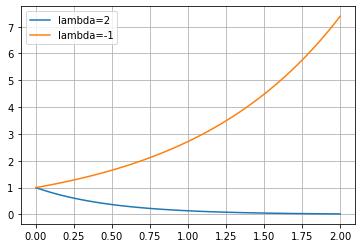

In [3]:
import numpy as np
import matplotlib.pyplot as plt
xx=np.linspace(0,2,101)
plt.plot(xx,np.exp(-2*xx),label="lambda=2")
plt.plot(xx,np.exp(xx),label="lambda=-1")
plt.legend()
plt.grid(True)
plt.show()

#### Linear system (Production destruction system)
There are two populations $c_1,\,c_2$, they destroy themselves and increase in function of the other population (linearly).

$$
\begin{equation}
\begin{aligned}
& \begin{cases}
c_1'(t)=c_2(t)-5c_1(t),\\
c_2'(t)=5c_1(t)-c_2(t),
\end{cases}\\
 &c_1(0)=c_1^0=0.9, \quad  &c_2(0)=c_2^0=0.1 \, .
\end{aligned}
\end{equation}
$$

Total mass is conserved
$$ 
c_1'+c_2'=0.
$$

We can compute the exact solution as exponential, by writing the problem in vectorial form 

$$
\begin{align}
c'(t)=Ac(t)\\
c(0)=c^0
\end{align}\\
c(t)=e^{At}c^0
$$
where the exponential matrix can be computed as 
$$
e^{At}=\sum_{k=0}^{\infty} \frac{A^k t^k}{k!}
$$
notice that $A^2=-6 A$,

$$
c(t)=c^0+\frac{1-e^{-6t}}{6} Ac^0.
$$

If $c_0>0$, then $c(t)>0$ for all $t\in \mathbb{R}$.

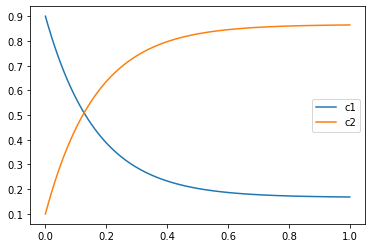

In [4]:
A=np.array([[-5,1],[5,1]])
c0=np.array([0.9,0.1])
tt=np.linspace(0,1,100)

ct=np.zeros((len(c0),len(tt)))
for it, t in enumerate(tt):
    ct[:,it]=c0+(1-np.exp(-6*t))/6*np.dot(A,c0)

plt.plot(tt,ct[0,:], label="c1")
plt.plot(tt,ct[1,:], label="c2")
plt.legend()

#### Lotka-Volterra predator-prey
$$
x'(t)=\alpha x - \beta x y\\
y'(t)=\delta xy - \gamma y
$$

No analytical solution is known for this problem.

The evolution looks like this.

![Lotka volterra evolution](images/chapter1/lotkaVolterra.png)

One can study equilibria of the dynamical system ($x'=0$, $y'=0$).

And the orbits around the stable equilibrium points. 

![Lotka volterra phase space](images/chapter1/lotkaVolterraPhase.png)

#### Nonlinear Oscillator
\begin{equation}
\begin{cases}
u'(t)=-\frac{v(t)}{n(t)}\\
v'(t)= \frac{u(t)}{n(t)}\\
n(t):=\sqrt{u^2(t)+v^2(t)}
\end{cases}
\end{equation}

Energy $\frac{n(t)^2}{2}$ is conserved
$$
\frac{d}{dt}\left(\frac{n^2}{2}\right)=\frac{d}{dt}\left(\frac{u^2+v^2}{2}\right)=u\frac{du}{dt}+v\frac{dv}{dt}=-u\frac{v}{n}+v\frac{u}{n}=0.
$$

Exact solution
$$
\begin{pmatrix}
u\\v
\end{pmatrix}= \begin{pmatrix} \cos(\theta) &-\sin(\theta)\\ \sin(\theta) & \cos(\theta)\end{pmatrix}\begin{pmatrix}
u^0\\v^0
\end{pmatrix},\qquad \theta(t)=\frac{t}{n}.
$$

![Oscillator](images/chapter1/nonLinearOscillator.png)

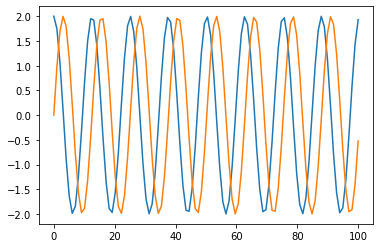

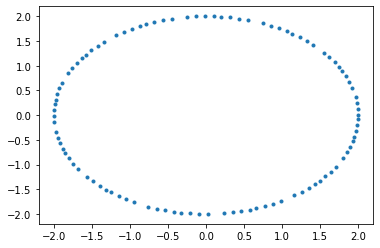

In [5]:
tt=np.linspace(0,100,100)
u0=np.array([2,0])
n0=np.sqrt(np.sum(u0**2))
uu=np.zeros((len(u0),len(tt)))
nt=np.zeros(len(tt))
for it,t in enumerate(tt):
    nt[it]=n0
    theta=t/nt[it]
    A=np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    uu[:,it]=np.dot(A,u0)
    
plt.figure()
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])
plt.show()

plt.figure()
plt.plot(uu[0,:],uu[1,:],'.')
plt.show()

#### Damped Nonlinear Oscillator
\begin{equation}
\begin{cases}
u'(t)=-\frac{v(t)}{n(t)}- \alpha u\\
v'(t)= \frac{u(t)}{n(t)}- \alpha v\\
n(t):=\sqrt{u^2(t)+v^2(t)}
\end{cases}
\end{equation}

Energy $\frac{n(t)^2}{2}$ is decreasing
$$
\frac{d}{dt}\left(\frac{n^2}{2}\right)=\frac{d}{dt}\left(\frac{u^2+v^2}{2}\right)=u\frac{du}{dt}+v\frac{dv}{dt}=-u\frac{v}{n}-\alpha u^2+v\frac{u}{n}-\alpha v^2=-2\alpha\left(\frac{n^2(t)}{2}\right)\leq 0,\\
\frac{n^2(t)}{2}=e^{-2\alpha t}\frac{n^2(0)}{2},\\
n(t) = e^{-\alpha t} n(0).
$$

Exact solution
$$
\begin{pmatrix}
u\\v
\end{pmatrix}= e^{-\alpha t} \begin{pmatrix} \cos(\theta) &-\sin(\theta)\\ \sin(\theta) & \cos(\theta)\end{pmatrix}\begin{pmatrix}
u^0\\v^0
\end{pmatrix}, \qquad \theta(t):= \frac{e^{\alpha t}-1}{\alpha n(t)}.
$$

![Damped Oscillator](images/chapter1/dampedNonLinearOscillator.png)

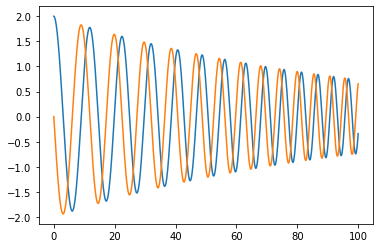

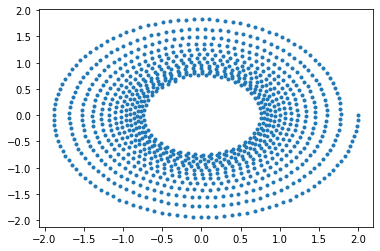

In [6]:
tt=np.linspace(0,100,1000)
alpha=0.01
u0=np.array([2,0])
n0=np.sqrt(np.sum(u0**2))
uu=np.zeros((len(u0),len(tt)))
nt=np.zeros(len(tt))
for it,t in enumerate(tt):
    nt[it]=np.exp(-alpha*t)*n0
    theta=(np.exp(-alpha*t)-1)/alpha/nt[it]
    A=np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    uu[:,it]=np.exp(-alpha*t)*np.dot(A,u0)
    
plt.figure()
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])
plt.show()

plt.figure()
plt.plot(uu[0,:],uu[1,:],'.')
plt.show()

#### Non linear pendulum
After adimensionalizations ti can be written as 

$$u''=-sin(u)$$

in our notation becomes

$$
\begin{cases}
u'=v\\
v'=-sin(u)
\end{cases}
$$

The total energy (kinetic + potential)

$$
\eta(t)=\frac{1}{2}v^2-\cos(u)
$$
is conserved.

$$
\frac{d\eta(t)}{dt}=v\frac{dv}{dt}+\sin(u)\frac{du}{dt}=-v\sin(u)+\sin(u)v=0.
$$

![pendulum](images/chapter1/Pendulum_135deg.gif)

#### Robertson's problem
It is a stiff problem where the time scales vary a lot. It is the equation for a chemical reaction system.
It consists of  

\begin{equation}
 \begin{cases}
  c_1'(t)&=10^4c_2(t)c_3(t)-0.04c_1(t),\\
  c_2'(t)&= 0.04c_1(t)-10^4c_2(t)c_3(t)-3\cdot 10^7c_2(t)^2,\\
  c_3'(t)&=3\cdot 10^7c_2(t)^2
 \end{cases}
\end{equation}
with initial conditions

$c^0=(1,0,0)$

Again we preserve the total mass 

$$
c_1'+c_2'+c_3'=0,
$$

all the quantities stay nonnegative $c_i(t)\geq 0$.

![Robertson](images/chapter1/Robertson.png)

#### SIR model
Well known in these days, SIR models the development of a sickness in a population. The population is subdivided into $S$ susceptible, $I$ infected and $R$ recovered.

$$
\begin{cases}
S'= -\beta I\frac{S}{N}\\
I' = \beta I \frac{S}{N} - \gamma I\\
R' = \gamma I\\
N=S+I+R
\end{cases}
$$

Total population $N$ does not change
$$
N'=S'+I'+R'=0,
$$
all the classes stay nonnegative $S,I,R\geq 0$.

![SIR simulation and data](https://upload.wikimedia.org/wikipedia/commons/a/ac/SIR_trajectory.png)

#### Semidiscretized PDE
Suppose we want to solve a time dependent PDE, e.g. find $U(x,t):\Omega \times [0,T] \to \mathbb{R}^d$

$$
\partial_t U + \partial_{xx}(a(U)) + \partial_x b(U) +c(U)=0, \qquad \forall x\in \Omega, \, \forall t \in [0,T].
$$

Once discretized the spatial domain, we obtain a vector $\underline{U}\in \mathbb{R}^N$ and we can discretize the operators $a,b,c$ with our favorite method (FV, FD, FEM, DG), obtaining

$$
\partial_t \underline{U} + D_2A(\underline{U}) + DB(\underline{U}) +C(\underline{U})=0, \qquad \forall t \in [0,T].
$$

Then, defining $f(\underline{U}):=-\left(  D_2A(\underline{U}) + DB(\underline{U}) +C(\underline{U})\right)$, we can solve the ODE

$$
\partial_t \underline{U} = f(\underline{U}).
$$

#### Semidiscretized conservation law
If we deal with a (scalar) hyperbolic conservation law, with $b$ a convex function,

$$
\partial_t U(x,t) + \partial_x b(U(x,t))=0, 
$$

a property we might be interested in preserving also at the discrete level is the total variation diminishing (TVD) character of the weak solution, i.e.,

$$
\sum_{i} |U^{n+1}_i -U^{n+1}_{i-1}|\leq |U^{n}_i -U^{n}_{i-1}|.
$$

Indeed, there are TVD fluxes for FV/FD schemes.

For example, there is interest in building schemes such that they can be written in the incremental form

$$
U^{n+1}_j=U^{n}_j +\Delta t \left [ C_{j+1/2}(U_{j+1}^n-U_{j}^n)-D_{j-1/2}(U_{j}^n-U_{j-1}^n) \right]
$$

where $C_{j+1/2},D_{j+1/2}\geq 0$ and $\Delta t (C_{j+1/2}+D_{j+1/2})\leq 1$.

This form guarantees that the explicit Euler method we have written above is TVD.

## Properties of some ODEs to keep in mind when discretizing  <a id='properties'></a>
#### Entropy/Energy/Liyapunov conservation/dissipation

We have seen in the previous examples that many ODE systems preserve some quantity of interest. It might be the physical energy, the total mass, an entropy or another Liyapunov functional. 
It might be important to preserve these properties also in the discrete settings, for example, denoting with $\eta$ the quantity we would like to preserve (or dissipate) we might want to require

\begin{equation}
\eta(u^{n+1})\stackrel{(\leq)}{=}\eta(u^n).
\end{equation}
 
#### Positivity/TVD
A positive system is such that, given initial conditions $y_i^0\geq 0 \, \forall i$, then the system stays positive for all times $y_i(t)\geq 0,\ \forall t,\, \forall i$.
This is the case of many physical, biological, chemical models, where the amount of some quantities must stay nonnegative.

Mathematically this condition is  met if $F\in \mathcal C(\mathbb R^S)$ is such that, when $y_i\to 0$, then $F(t,y)_i\geq 0$. 
More formally one can write

$$
\lim_{y_i\to 0^+} F(t,y)_i \geq 0, \, \forall t \in \mathbb R, \, \forall y_j \in \mathbb R^+ \text{ with }j\neq i.
$$

By contradiction one can prove that this prevents $y_i$ to become negative.

Again, one may want to preserve this property in the discrete solution.

## Existence and uniqueness of solutions (briefly) <a id='existence'></a>

Let us write the ODE on $I:=[t_0, t_{end}]\subset \mathbb{R}$, the unknown variable $y:I\to \mathbb{R}^{S}$ and the *continuous* function $F:I\times \mathbb{R}^S\to\mathbb{R}^S$. The initial value problem (IVP) (or Cauchy problem) of a system of ODEs  written as 

$$
\begin{equation}
\begin{cases}\label{eq:IVP}
\frac{dy}{dt} = F(t,y(t)),\\
y(0)=y_0.
\end{cases}
\end{equation}
$$

### Theorem (Cauchy-Peano) Existence
Assume that $F$ is continuous in a neighbourhood of $(t_0,y_0) \in I \times \mathbb R^S$. Then, there exists an interval $J$,  neighbourhood of $y_0$, such that $y'(t)=F(t,y(t))$ for all $t\in J$.


The proof of the theorem the integral form of the ODE and builds a family of equicontinuous solutions in $\mathcal C^0(J)$, then it uses Ascoli-Arzelà.

This defines the concept of **local solutions** that can be extended to larger intervals, until having a **global solution**.

Now, if we look for a solution, we would like to know if there is more than one. For example

$$
\begin{cases} y'=\sqrt{|y|} \\ y(0)=0 \end{cases}
$$
has multiple solutions.
Consider $y(t)=0$. This is a solution.

And $y=t^{2}/4$ is also a solution.

Which one should we consider?

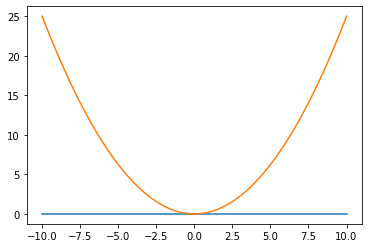

In [32]:
tt=np.linspace(-10,10,100)
yy0=0*tt;
yy1=tt**2./4.
plt.plot(tt,yy0)
plt.plot(tt,yy1)

### Theorem (Cauchy-Lipschitz) Uniqueness
If $F$ is Lipschitz continuous on $I\times \mathbb R^S$ with constant $L$, i.e., for any $(t,y)$ and $(t,z)\in I \times \mathbb R^S$ 
$$
||F(t,y)-F(t,z)||\leq L ||y-z||,
$$
then the problem has a unique solution.

#### Proof Ingredients
* Fixed point theorem
* Integral form
* Gronwall Lemma

Under this assumption it makes sense to search for the *exact* solution and try to get it or a **good approximation** of it!

### Regularity of the solution
Let $y\in \mathcal C^1(I)$ be the solution of the ODE 


$$
\begin{equation}
\begin{cases}\label{eq:IVP}
\frac{dy}{dt} = F(t,y(t)),\\
y(0)=y_0.
\end{cases}
\end{equation}
$$

If $F\in \mathcal{C}$ is $p$ times differentiable in $(t,y(t))$, then $y$ is $p+1$ times differentiable at $t$ and 

$$
y^{(p+1)}(t)=F^{(p)}(t,y(t)),
$$

where $F^{(l)}$ are defined recursively as

$$
F^{(0)}(t,y)=F(t,y),\\
F^{(l+1)}(t,y)= \frac{\partial F^{(l)}}{\partial t}(t,y)+\frac{\partial F^{(l)}}{\partial y}(t,y).
$$